This is my first actual project which is not a Coursera exercise. So there are alot of things I'll do for the first time here like using a CSV file.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('salary_data.csv')
x_train=df['YearsExperience'].values
y_train=df['Salary'].values

In [3]:
print(f"YOE={x_train}")
print(f"Salary={y_train}")

YOE=[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]
Salary=[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


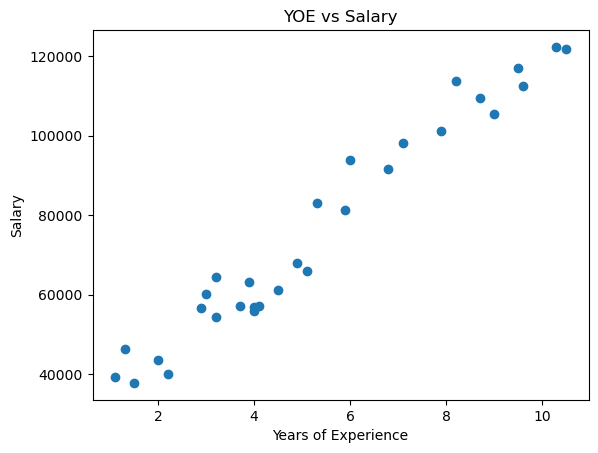

In [4]:
plt.scatter(x_train, y_train)
plt.title("YOE vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [5]:
def compute_cost(x,y,w,b):
    m=x.shape[0]
    total_cost=0
    for i in range(m):
        f_wb=w*x[i]+b
        error=(f_wb-y[i])**2
        total_cost=total_cost+error
    total_cost=(1/(2*m))*(total_cost)
    return total_cost


In [6]:
def compute_gradient(x,y,w,b):
    dj_dw=0
    dj_db=0
    m=x.shape[0]
    for i in range(m):
        f_wb=(w*x[i])+b
        dw_temp=(f_wb-y[i])*x[i]
        db_temp=(f_wb-y[i])
        dj_dw=dw_temp+dj_dw
        dj_db=db_temp+dj_db
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    return dj_dw,dj_db


In [7]:
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, 0, 0)
print(f"dj_dw: {tmp_dj_dw}")
print(f"dj_db: {tmp_dj_db}")

dj_dw: -477398.7
dj_db: -76003.0


In [8]:
def gradient_descent(x,y,w_in,b_in,num_iters,alpha):
    J_history=[]
    w=w_in
    b=b_in
    for i in range(num_iters):
        if(i%100==0):
            jVal=compute_cost(x,y,w,b)
            print(f"Value of Cost Function at iteration {  i} is {jVal}")
            J_history.append(jVal)
        dj_dw,dj_db=compute_gradient(x,y,w,b)
        temp_w=w-alpha*dj_dw
        temp_b=b-alpha*dj_db
        w=temp_w
        b=temp_b
    plt.plot(J_history)
    return w,b   


Value of Cost Function at iteration 0 is 3251477635.366667
Value of Cost Function at iteration 100 is 55941133.03658127
Value of Cost Function at iteration 200 is 42025778.686374
Value of Cost Function at iteration 300 is 32914640.425461028
Value of Cost Function at iteration 400 is 26949083.3637944
Value of Cost Function at iteration 500 is 23043109.15542645
Value of Cost Function at iteration 600 is 20485655.70074884
Value of Cost Function at iteration 700 is 18811152.02409112
Value of Cost Function at iteration 800 is 17714763.521687772
Value of Cost Function at iteration 900 is 16996898.422339886
Final w:9876.112752879602
Final b:22920.48554852225


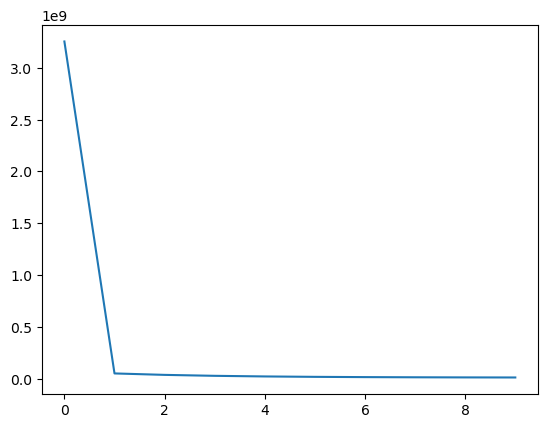

In [9]:
w_init=0
b_init=0
iterations=1000
tmp_alpha=0.01
w_final,b_final=gradient_descent(x_train,y_train,w_init,b_init,iterations,tmp_alpha)
print(f"Final w:{w_final}")
print(f"Final b:{b_final}")

In [10]:
def predict_salary(x):
    predicted_y=w_final*x+b_final
    print(f"Predicted Salary is ${predicted_y}")

In [11]:
predict_salary(12)

Predicted Salary is $141433.83858307748


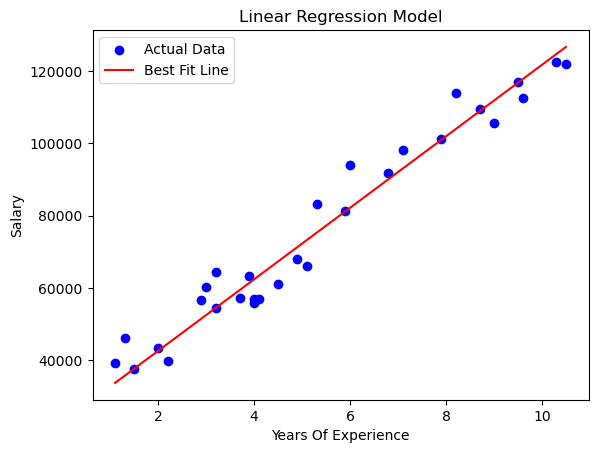

In [12]:
predictions=w_final*x_train+b_final
plt.scatter(x_train,y_train, color='blue',label="Actual Data")
plt.plot(x_train,predictions,color="red",label="Best Fit Line")
plt.xlabel("Years Of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression Model")
plt.legend()
plt.show()